## Load Libraries

In [1]:
# libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from sklearn.metrics import confusion_matrix

# Bokeh libraries
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource, PanTool, ResetTool, BoxZoomTool, Panel, Tabs
from bokeh.layouts import layout
from bokeh.transform import cumsum, dodge
from bokeh.palettes import Category20c

## Load Data

In [2]:
base_path = os.path.join('..', 'datasets')
json_path = os.path.join(base_path, 'CSVM.json')
pr = pd.read_json(json_path)

## Data classification

In [3]:
def Check(pr):
    if pr['Y'] == pr['prediction_C_SVM']:
        return "True"
    else:
        return "False"

pr['result'] = pr.apply(Check, axis=1)

In [4]:
prm1 = pr[pr['Y'] == -1]

In [5]:
prm1.head(2)  #salary < 50k

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,prediction_C_SVM,result
0,-1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,-1,True
1,-1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,-1,True


In [6]:
pr1 = pr[pr['Y'] == 1]

In [7]:
# Error denotes the misclassified case, Correct denotes the correctly classifed cases
error1 = prm1[prm1['prediction_C_SVM'] == 1]
correct1 = prm1[prm1['prediction_C_SVM'] == -1]
error2 = pr1[pr1['prediction_C_SVM'] == -1]
correct2 = pr1[pr1['prediction_C_SVM'] == 1]

In [8]:
error = error1.append(error2)
error = error.reset_index()
error = error.drop(columns=['index'])
correct = correct1.append(correct2)
correct = correct.reset_index()
correct = correct.drop(columns=['index'])

## Confusion Matrix and Correlation Heatmaps

In [9]:
confusion_matrix_error = pd.crosstab(pr['Y'],
                                     pr['prediction_C_SVM'],
                                     rownames=['Actual'],
                                     colnames=['Predicted'])

In [10]:
confusion_matrix_error

Predicted,-1,1
Actual,,
-1,10329,1031
1,1521,2179


In [11]:
corr_matrix_error = error.corr()

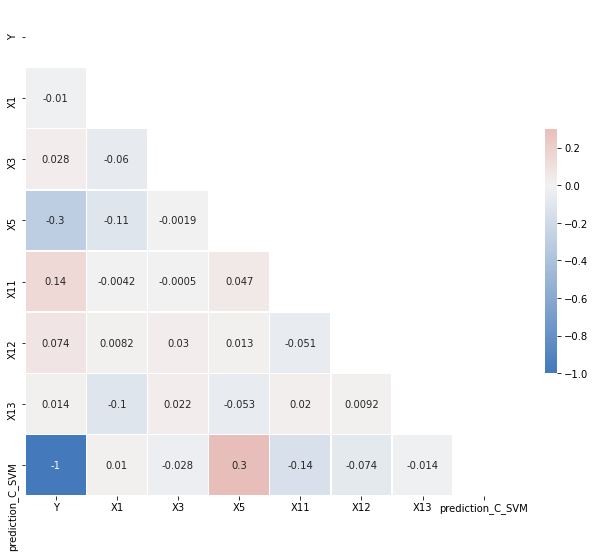

In [12]:
mask = np.triu(np.ones_like(corr_matrix_error, dtype=bool))

# Matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Custom diverging colormap
cmap = sns.diverging_palette(250, 15, center='light', as_cmap=True)

# Heatmap with mask and aspect ratio
sns.heatmap(corr_matrix_error,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True)

save_path = os.path.join('output', 'correlation_misclassified.jpeg')
plt.savefig(save_path)

In [13]:
corr_matrix_correct = correct.corr()

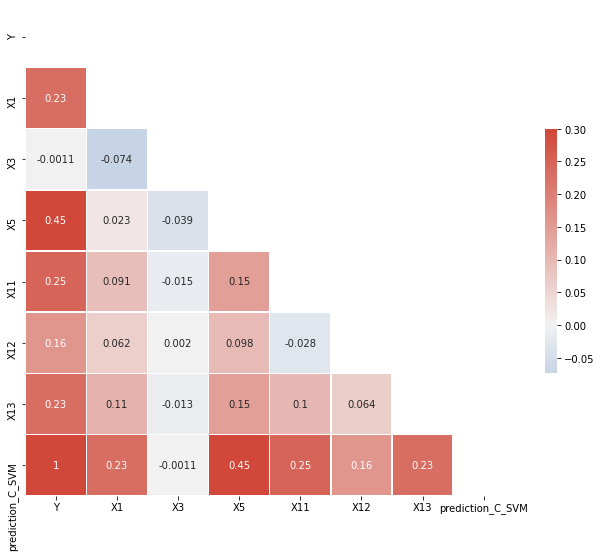

In [14]:
mask = np.triu(np.ones_like(corr_matrix_correct, dtype=bool))

# Matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Custom diverging colormap
cmap = sns.diverging_palette(250, 15, center='light', as_cmap=True)

# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_correct,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True)

save_path = os.path.join('output', 'correlation_classified.jpeg')
plt.savefig(save_path)

In [15]:
y_true = pr['Y']
y_pred = pr['prediction_C_SVM']
confusion_matrix = confusion_matrix(y_true, y_pred)

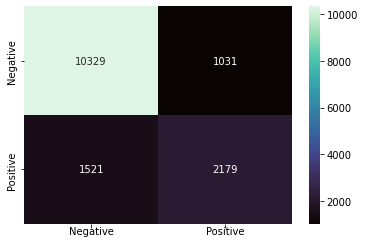

In [16]:
g = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='mako')
g.set_xticklabels(['Negative', 'Positive'], va='center')
g.set_yticklabels(['Negative', 'Positive'], va='center')

save_path = os.path.join('output', 'confusion_matrix.jpeg')
plt.savefig(save_path)

## Data cleaning for Bokeh dashboard

In [17]:
plot1 = correct.groupby(pd.cut(correct["X1"], np.arange(15, 90, 3))).size()
plot11 = error.groupby(pd.cut(error["X1"], np.arange(15, 90, 3))).size()

In [18]:
plot1 = plot1.to_frame()
plot11 = plot11.to_frame()

In [19]:
plot1 = plot1.reset_index()
plot11 = plot11.reset_index()

In [20]:
plot1 = plot1.reset_index()
plot11 = plot11.reset_index()

In [21]:
plot1 = plot1.rename(columns={"X1": "Range", 0: "Count"})
plot11 = plot11.rename(columns={"X1": "Range", 0: "Count"})

In [22]:
plot2 = correct.groupby(pd.cut(correct["X3"], np.arange(13492, 1490400,
                                                        10000))).size()
plot22 = error.groupby(pd.cut(error["X3"], np.arange(13492, 1490400,
                                                     10000))).size()

In [23]:
plot2 = plot2.to_frame()
plot22 = plot22.to_frame()

In [24]:
plot2 = plot2.reset_index()
plot22 = plot22.reset_index()

In [25]:
plot2 = plot2.reset_index()
plot22 = plot22.reset_index()

In [26]:
plot2 = plot2.rename(columns={"X3": "Range", 0: "Count"})
plot22 = plot22.rename(columns={"X3": "Range", 0: "Count"})

In [27]:
plot3 = correct.groupby(["X5"]).size()
plot33 = error.groupby(["X5"]).size()

In [28]:
plot3 = plot3.to_frame()
plot33 = plot33.to_frame()

In [29]:
plot3 = plot3.reset_index()
plot33 = plot33.reset_index()

In [30]:
plot3 = plot3.reset_index()
plot33 = plot33.reset_index()

In [31]:
plot3 = plot3.rename(columns={"X5": "Range", 0: "Count"})
plot33 = plot33.rename(columns={"X5": "Range", 0: "Count"})

In [32]:
plot4 = correct.groupby(pd.cut(correct["X11"], np.arange(0, 99999,
                                                         10000))).size()
plot44 = error.groupby(pd.cut(error["X11"], np.arange(0, 99999, 10000))).size()

In [33]:
plot4 = plot4.to_frame()
plot44 = plot44.to_frame()

In [34]:
plot4 = plot4.reset_index()
plot44 = plot44.reset_index()

In [35]:
plot4 = plot4.reset_index()
plot44 = plot44.reset_index()

In [36]:
plot4 = plot4.rename(columns={"X5": "Range", 0: "Count"})
plot44 = plot44.rename(columns={"X5": "Range", 0: "Count"})

In [37]:
plot5 = correct.groupby(pd.cut(correct["X12"], np.arange(0, 3770, 500))).size()
plot55 = error.groupby(pd.cut(error["X12"], np.arange(0, 3770, 500))).size()

In [38]:
plot5 = plot5.to_frame()
plot55 = plot55.to_frame()

In [39]:
plot5 = plot5.reset_index()
plot55 = plot55.reset_index()

In [40]:
plot5 = plot5.reset_index()
plot55 = plot55.reset_index()

In [41]:
plot5 = plot5.rename(columns={"X12": "Range", 0: "Count"})
plot55 = plot55.rename(columns={"X12": "Range", 0: "Count"})

In [42]:
plot6 = correct.groupby(pd.cut(correct["X13"], np.arange(0, 99, 10))).size()
plot66 = error.groupby(pd.cut(error["X13"], np.arange(0, 99, 10))).size()

In [43]:
plot6 = plot6.to_frame()
plot66 = plot66.to_frame()

In [44]:
plot6 = plot6.reset_index()
plot66 = plot66.reset_index()

In [45]:
plot6 = plot6.reset_index()
plot66 = plot66.reset_index()

In [46]:
plot6 = plot6.rename(columns={"X13": "Range", 0: "Count"})
plot66 = plot66.rename(columns={"X13": "Range", 0: "Count"})

In [47]:
plot7 = pr.groupby(['X2', 'result'])[['result']].count()

## Continuous Variables

### First figure - Age

In [48]:
# Visualising the Bokeh figure
p = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p.circle(plot1['index'],
         plot1['Count'],
         line_width=2,
         color='olivedrab',
         alpha=0.8,
         muted_color='White',
         muted_alpha=0.2,
         legend_label='Classified')
p.line(plot1['index'],
       plot1['Count'],
       line_width=2,
       color='olivedrab',
       alpha=0.4,
       muted_color='White',
       muted_alpha=0.2,
       legend_label='Classified')
p.circle(plot11['index'],
         plot11['Count'],
         line_width=2,
         color='firebrick',
         alpha=0.8,
         muted_color='White',
         muted_alpha=0.2,
         legend_label='Misclassified')
p.line(plot11['index'],
       plot11['Count'],
       line_width=2,
       color='firebrick',
       muted_color='White',
       alpha=0.4,
       legend_label='Misclassified')

# Legend properties
p.legend.location = "top_right"
p.legend.click_policy = "hide"

# Label and ticks
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Count'
p.xaxis.ticker = [0, 5, 10, 15, 20, 25]
p.xaxis.major_label_overrides = {
    0: '15',
    5: '30',
    10: '45',
    15: '60',
    20: '75',
    25: '90'
}
p.title.text = 'Click on legend entries to hide the corresponding lines'

###  Second figure  - Final Weight

In [49]:
# Visualising the Bokeh figure
p2 = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p2.circle(plot2['index'],
          plot2['Count'],
          line_width=1,
          color='olivedrab',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Classified')
p2.circle(plot22['index'],
          plot22['Count'],
          line_width=1,
          color='firebrick',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Misclassified')

# Legend properties
p2.legend.location = "top_right"
p2.legend.click_policy = "hide"

# Label and ticks
p2.xaxis.axis_label = 'Final Weight'
p2.xaxis.ticker = [0, 20, 40, 60, 80, 100, 120, 140]
p2.xaxis.major_label_overrides = {
    0: '10000',
    20: '20000',
    40: '40000',
    60: '60000',
    80: '80000',
    100: '1000000',
    120: '1200000',
    140: '1400000'
}
p2.yaxis.axis_label = 'Count'

### Third figure - Education Number

In [50]:
# Visualising the Bokeh figure
p3 = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p3.circle(plot3['index'],
          plot3['Count'],
          line_width=1,
          color='olivedrab',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Classified')
p3.circle(plot33['index'],
          plot33['Count'],
          line_width=1,
          color='firebrick',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Misclassified')
p3.line(plot3['index'],
        plot3['Count'],
        line_width=2,
        color='olivedrab',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Classified')
p3.line(plot33['index'],
        plot33['Count'],
        line_width=2,
        color='firebrick',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Misclassified')

# Labels
p3.xaxis.axis_label = 'Education Number'
p3.yaxis.axis_label = 'Count'

# Legend properties
p3.legend.location = "top_right"
p3.legend.click_policy = "hide"

### Fourth figure - Capital Gain

In [51]:
# Visualising the Bokeh figure
p4 = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p4.circle(plot4['index'],
          plot4['Count'],
          line_width=1,
          color='olivedrab',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Classified')
p4.circle(plot44['index'],
          plot44['Count'],
          line_width=1,
          color='firebrick',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Misclassified')
p4.line(plot4['index'],
        plot4['Count'],
        line_width=2,
        color='olivedrab',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Classified')
p4.line(plot44['index'],
        plot44['Count'],
        line_width=2,
        color='firebrick',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Misclassified')

# Labels and ticks
p4.xaxis.axis_label = 'Capital Gain'
p4.xaxis.ticker = [0, 2, 4, 6, 8]
p4.xaxis.major_label_overrides = {
    0: '10000',
    2: '20000',
    4: '40000',
    6: '60000',
    8: '80000',
    10: '100000'
}
p4.yaxis.axis_label = 'Count'

# Legend properties
p4.legend.location = "top_right"
p4.legend.click_policy = "hide"

### Fifth figure - Capital Loss

In [52]:
# Visualising the Bokeh figure
p5 = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p5.circle(plot5['index'],
          plot5['Count'],
          line_width=1,
          color='olivedrab',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Classified')
p5.circle(plot55['index'],
          plot55['Count'],
          line_width=1,
          color='firebrick',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Misclassified')
p5.line(plot5['index'],
        plot5['Count'],
        line_width=2,
        color='olivedrab',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Classified')
p5.line(plot55['index'],
        plot55['Count'],
        line_width=2,
        color='firebrick',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Misclassified')

# Labels and ticks
p5.xaxis.axis_label = 'Capital Loss'
p5.xaxis.ticker = [0, 1, 2, 3, 4, 5, 6]
p5.xaxis.major_label_overrides = {
    0: '500',
    1: '1000',
    2: '1500',
    3: '2000',
    4: '2500',
    5: '3000',
    6: '3500'
}
p5.yaxis.axis_label = 'Count'

# Legend properties
p5.legend.location = "top_right"
p5.legend.click_policy = "hide"

### Sixth figure - Hours per week

In [53]:
# Visualising the Bokeh figure
p6 = figure(plot_width=500, plot_height=250, background_fill_color="#fafafa")
p6.circle(plot6['index'],
          plot6['Count'],
          line_width=2,
          color='olivedrab',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Classified')
p6.circle(plot66['index'],
          plot66['Count'],
          line_width=2,
          color='firebrick',
          alpha=0.8,
          muted_color='White',
          muted_alpha=0.2,
          legend_label='Misclassified')
p6.line(plot6['index'],
        plot6['Count'],
        line_width=2,
        color='olivedrab',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Classified')
p6.line(plot66['index'],
        plot66['Count'],
        line_width=2,
        color='firebrick',
        alpha=0.4,
        muted_color='White',
        muted_alpha=0.2,
        legend_label='Misclassified')

# Labels and ticks
p6.xaxis.axis_label = 'Hours/ Week'
p6.xaxis.ticker = [0, 2, 4, 6, 8]
p6.xaxis.major_label_overrides = {
    0: '10',
    2: '20',
    4: '40',
    6: '60',
    8: '80',
    10: '100'
}
p6.yaxis.axis_label = 'Count'

# Legend properties
p6.legend.location = "top_right"
p6.legend.click_policy = "hide"

## Categorical Variables 

### First figure - Work Class 

In [54]:
categories = [
    'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc',
    'State-gov', 'Without-pay'
]
category = ['Classified', 'Misclassified']

data = {
    'categories': categories,
    'Classified': [363, 811, 9352, 419, 1022, 536, 5],
    'Misclassified': [100, 222, 1669, 153, 275, 131, 2]
}

tools1 = [BoxZoomTool(), PanTool(), ResetTool()]

source = ColumnDataSource(data=data)

# Visualizing the figure
p7 = figure(x_range=categories,
            y_range=(0, 10000),
            plot_height=250,
            plot_width=500,
            title="Work Class Categories",
            tools=tools1)
p7.vbar(x=dodge('categories', -0.25, range=p7.x_range),
        width=0.4,
        top='Classified',
        color="olivedrab",
        alpha=0.6,
        legend_label='Classified',
        line_color='white',
        source=source)
p7.vbar(x=dodge('categories', 0.25, range=p7.x_range),
        width=0.4,
        top='Misclassified',
        legend_label='Misclassified',
        color="firebrick",
        alpha=0.6,
        line_color='white',
        source=source)

p7.x_range.range_padding = 0.1
p7.xgrid.grid_line_color = None
p7.xaxis.major_label_orientation = 0.3

# Hover Tool
hover1 = HoverTool(
    tooltips=[('Classified',
               '@Classified'), ('Misclassified',
                                '@Misclassified'), ('Work Class',
                                                    '@categories')])
p7.add_tools(hover1)

# Legend properties
p7.legend.location = "top_right"
p7.legend.orientation = "vertical"
p7.legend.click_policy = "hide"

In [55]:
plot8 = pr.groupby(['X10', 'result'])[['result']].count()

### Second figure - Gender 

In [56]:
sex = ['Female', 'Male']
category = ['Classified', 'Misclassified']

data = {'sex': sex, 'Classified': [4468, 8040], 'Misclassified': [445, 2107]}

tools2 = [BoxZoomTool(), PanTool(), ResetTool()]

source = ColumnDataSource(data=data)

# Visualizing the figure
p8 = figure(x_range=sex,
            y_range=(0, 8100),
            plot_height=250,
            plot_width=500,
            title="Sex of individuals",
            tools=tools2)

p8.vbar(x=dodge('sex', -0.25, range=p8.x_range),
        width=0.4,
        top='Classified',
        color="olivedrab",
        alpha=0.6,
        legend_label='Classified',
        source=source)
p8.vbar(x=dodge('sex', 0.25, range=p8.x_range),
        width=0.4,
        top='Misclassified',
        legend_label='Misclassified',
        color="firebrick",
        alpha=0.6,
        source=source)

p8.x_range.range_padding = 0.1
p8.xgrid.grid_line_color = None
p8.xaxis.major_label_orientation = 0.3

# Hover tool
hover2 = HoverTool(
    tooltips=[('Classified', '@Classified'), ('Misclassified',
                                              '@Misclassified'), ('Sex',
                                                                  '@sex')])
p8.add_tools(hover2)

# Legend properties
p8.legend.location = "top_right"
p8.legend.click_policy = "hide"
p8.legend.orientation = "vertical"

In [57]:
plot9 = pr.groupby(['X6', 'result'])[['result']].count()

### Third figure - Marital Status

In [58]:
status = ['Divorced', 'Married', 'Never-married', 'Seperated', 'Widowed']
category = ['Classified', 'Misclassified']

data = {
    'status': status,
    'Classified': [1879, 5143, 4641, 437, 408],
    'Misclassified': [204, 2040, 231, 35, 42]
}

tools3 = [BoxZoomTool(), PanTool(), ResetTool()]

source = ColumnDataSource(data=data)

# Visualizing the figure
p9 = figure(x_range=status,
            y_range=(0, 5200),
            plot_height=250,
            plot_width=500,
            title="Marital Status of individuals",
            tools=tools3)

p9.vbar(x=dodge('status', -0.25, range=p9.x_range),
        width=0.4,
        top='Classified',
        color="olivedrab",
        alpha=0.6,
        legend_label='Classified',
        line_color='white',
        source=source)
p9.vbar(x=dodge('status', 0.25, range=p9.x_range),
        width=0.4,
        top='Misclassified',
        legend_label='Misclassified',
        alpha=0.6,
        color="firebrick",
        line_color='white',
        source=source)

p9.x_range.range_padding = 0.1
p9.xgrid.grid_line_color = None
p9.xaxis.major_label_orientation = 0.3

# Hover tool
hover3 = HoverTool(
    tooltips=[('Classified',
               '@Classified'), ('Misclassified',
                                '@Misclassified'), ('Status', '@status')])

p9.add_tools(hover3)

# Legend properties
p9.legend.location = "top_right"
p9.legend.orientation = "vertical"
p9.legend.click_policy = "hide"

In [59]:
plot10 = pr.groupby(['X10', 'result'])[['result']].count()

### Fourth figure - Race

In [60]:
races = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
category = ['Classified', 'Misclassified']

data = {
    'races': races,
    'Classified': [129, 330, 1269, 100, 10680],
    'Misclassified': [20, 78, 142, 22, 2290]
}

tools4 = [BoxZoomTool(), PanTool(), ResetTool()]

source = ColumnDataSource(data=data)

# Visualizing the figure
p10 = figure(x_range=races,
             y_range=(0, 10700),
             plot_height=250,
             plot_width=500,
             title="Race of individuals",
             tools=tools4)
p10.vbar(x=dodge('races', -0.25, range=p10.x_range),
         width=0.4,
         top='Classified',
         color="olivedrab",
         alpha=0.6,
         legend_label='Classified',
         line_color='white',
         source=source)
p10.vbar(x=dodge('races', 0.25, range=p10.x_range),
         width=0.4,
         top='Misclassified',
         legend_label='Misclassified',
         alpha=0.6,
         color="firebrick",
         line_color='white',
         source=source)

p10.x_range.range_padding = 0.1
p10.xgrid.grid_line_color = None
p10.xaxis.major_label_orientation = 0.3

# Legend properties
p10.legend.click_policy = "hide"
p10.legend.location = "top_left"
p10.legend.orientation = "vertical"

# Hover tool
hover4 = HoverTool(
    tooltips=[('Classified',
               '@Classified'), ('Misclassified',
                                '@Misclassified'), ('Race', '@races')])

p10.add_tools(hover4)

In [61]:
plot101 = pr.groupby(['X7', 'result'])[['result']].count()

### Fifth Figure - Occupation Classified

In [62]:
x = {
    'Adm-clerical': 1608,
    'Armed-Forces': 4,
    'Craft-repair': 1567,
    'Exec-managerial': 1519,
    'Farming-fishing': 439,
    'Handlers-cleaners': 643,
    'Machine-op-inspct': 876,
    'Other-service': 1531,
    'Priv-house-serv': 87,
    'Prof-specialty': 1505,
    'Protective-serv': 249,
    'Sales': 1496,
    'Tech-support': 396,
    'Transport-moving': 588
}

data = pd.Series(x).reset_index(name='value').rename(
    columns={'index': 'occup'})
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
data['color'] = Category20c[len(x)]

# Visualizing the figure
p11 = figure(plot_height=400,
             plot_width=500,
             title="Classified cases - Occupation",
             toolbar_location=None,
             tools="hover",
             tooltips="@occup: @value",
             x_range=(-0.5, 1.0))

p11.wedge(x=0,
          y=1,
          radius=0.3,
          start_angle=cumsum('angle', include_zero=True),
          end_angle=cumsum('angle'),
          line_color="white",
          fill_color='color',
          legend_field='occup',
          source=data)

p11.axis.axis_label = None
p11.axis.visible = False
p11.grid.grid_line_color = None

### Sixth Figure - Occupation Misclassified

In [63]:
x = {
    'Adm-clerical': 211,
    'Armed-Forces': 1,
    'Craft-repair': 423,
    'Exec-managerial': 473,
    'Farming-fishing': 52,
    'Handlers-cleaners': 53,
    'Machine-op-inspct': 128,
    'Other-service': 65,
    'Priv-house-serv': 2,
    'Prof-specialty': 465,
    'Protective-serv': 83,
    'Sales': 328,
    'Tech-support': 112,
    'Transport-moving': 156
}

data = pd.Series(x).reset_index(name='value').rename(
    columns={'index': 'occup'})
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
data['color'] = Category20c[len(x)]

p12 = figure(plot_height=400,
             plot_width=500,
             title="Misclassified cases - Occupation ",
             toolbar_location=None,
             tools="hover",
             tooltips="@occup: @value",
             x_range=(-0.5, 1.0))

p12.wedge(x=0,
          y=1,
          radius=0.3,
          start_angle=cumsum('angle', include_zero=True),
          end_angle=cumsum('angle'),
          line_color="white",
          fill_color='color',
          legend_field='occup',
          source=data)

p12.axis.axis_label = None
p12.axis.visible = False
p12.grid.grid_line_color = None

In [64]:
# Visualise dashboard with tab layout

l1 = layout([[p, p2], [p3, p4], [p5, p6]])
l2 = layout([[p7, p8], [p9, p10], [p11, p12]])

tab1 = Panel(child=l1, title="Continuous")
tab2 = Panel(child=l2, title="Categorical")
tabs = Tabs(tabs=[tab1, tab2])

save_path = os.path.join('output', 'dashboard_tabs.html')
output_file(save_path)

show(Tabs(tabs=[tab1, tab2]))